In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install pandas_profiling 
import  ydata_profiling 
import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

import sklearn as sk

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

In [14]:
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
credit_card = pd.read_excel('CREDIT CARD USERS DATA.xlsx')

In [16]:
credit_card.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [89]:
print(f"Dataset comprises of {credit_card.shape[0]} observations and {credit_card.shape[1]} characteristics.")

Dataset comprises of 5000 observations and 129 characteristics.


In [17]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(31), int64(99), object(2)
memory usage: 5.0+ MB


In [18]:
credit_card.describe(percentiles=[.01,.05,.25,.5,.75,.9,.95,.99])

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,...,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,...,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,1.000000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.00000,1.000000,0.000000,18.000000,2.000000,8.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,1.00000,1.000000,0.000000,20.000000,2.000000,9.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1.000000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.00000,2.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,3.000000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.00000,7.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,4.000000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.00000,15.000000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
90%,5.00000,5.000000,1.000000,72.000000,6.000000,19.000000,4.000000,6.0000,1.00000,25.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [19]:
credit_card.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=132)

# Advanced data analysis using pandas profiling library


In [ ]:
print(f"Number of duplicates in column customerID = {credit_card[credit_card.custid.duplicated()].shape[0]}")

In [ ]:
### Insight
* There are no duplicates and each row corresponds to a single customer

In [22]:
credit_card.drop(columns=['custid','birthmonth'],inplace=True)

In [9]:
#Detailed profiling using pandas profiling

output = pandas_profiling.ProfileReport(credit_card)
output

C:\Users\nanda\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,130
Number of observations,5000
Total Missing (%),0.2%
Total size in memory,5.0 MiB
Average record size in memory,1.0 KiB
Numeric,59
Categorical,1
Boolean,49
Date,0
Text (Unique),1
Rejected,20


In [21]:
#Datatypes of given features of dataset.
print(credit_card.dtypes)

custid          object
region           int64
townsize       float64
gender           int64
age              int64
                ...   
ownfax           int64
news             int64
response_01      int64
response_02      int64
response_03      int64
Length: 132, dtype: object


In [23]:
credit_card.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

### Target variable
Deriving total spend using primary and secondar credit cards spend

In [24]:
# Calculating cards spent by using two different card types spent 
credit_card['total_spend']=credit_card.cardspent+credit_card.card2spent
credit_card.total_spend.head()

0    149.46
1     77.54
2    359.97
3    359.41
4    507.83
Name: total_spend, dtype: float64

In [95]:
len(credit_card.total_spend.unique())

4886

### Insight
* We have 4886 unique values for total credit spend

In [25]:
# Dropping variables like cardspent and card2spent
credit_card.drop(columns=['cardspent','card2spent'],inplace=True)

# EDA

### Identifying categorical and numerical variables based on the Data Dictionary

In [26]:
#Defining categorical variables
for x in ['region','gender','jobcat', 'union','retire','default','marital','homeown','hometype','carown','cartype','carcatvalue','carbought','carbuy',
                 'commute','commutecat','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute',
                 'reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee',
                 'card2','card2type','card2benefit','card2fee',
                 'active','bfast','churn','tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']:
    credit_card[x] = credit_card[x].astype('object')

In [27]:
dict(credit_card.dtypes)

{'region': dtype('O'),
 'townsize': dtype('float64'),
 'gender': dtype('O'),
 'age': dtype('int64'),
 'agecat': dtype('int64'),
 'ed': dtype('int64'),
 'edcat': dtype('int64'),
 'jobcat': dtype('O'),
 'union': dtype('O'),
 'employ': dtype('int64'),
 'empcat': dtype('int64'),
 'retire': dtype('O'),
 'income': dtype('int64'),
 'lninc': dtype('float64'),
 'inccat': dtype('int64'),
 'debtinc': dtype('float64'),
 'creddebt': dtype('float64'),
 'lncreddebt': dtype('float64'),
 'othdebt': dtype('float64'),
 'lnothdebt': dtype('float64'),
 'default': dtype('O'),
 'jobsat': dtype('int64'),
 'marital': dtype('O'),
 'spoused': dtype('int64'),
 'spousedcat': dtype('int64'),
 'reside': dtype('int64'),
 'pets': dtype('int64'),
 'pets_cats': dtype('int64'),
 'pets_dogs': dtype('int64'),
 'pets_birds': dtype('int64'),
 'pets_reptiles': dtype('int64'),
 'pets_small': dtype('int64'),
 'pets_saltfish': dtype('int64'),
 'pets_freshfish': dtype('int64'),
 'homeown': dtype('O'),
 'hometype': dtype('O'),
 'a

In [28]:
numeric_var_names=[key for key in dict(credit_card.dtypes) if dict(credit_card.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(credit_card.dtypes) if dict(credit_card.dtypes)[key] in ['object', 'O']]

In [29]:
print(numeric_var_names)

['townsize', 'age', 'agecat', 'ed', 'edcat', 'employ', 'empcat', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'jobsat', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'address', 'addresscat', 'cars', 'carvalue', 'commutetime', 'cardtenure', 'cardtenurecat', 'card2tenure', 'card2tenurecat', 'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'total_spend']


In [30]:
print(cat_var_names)

['region', 'gender', 'jobcat', 'union', 'retire', 'default', 'marital', 'homeown', 'hometype', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'card2', 'card2type', 'card2benefit', 'card2fee', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']


In [31]:
#Creating separate dataframe for numeric type variables.
credit_card_num=credit_card[numeric_var_names]
credit_card_num.head(5)

,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
0,2.0,20,2,15,3,0,1,31,3.433987,2,...,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,5.0,22,2,17,4,0,1,15,2.708050,1,...,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,4.0,67,6,14,2,16,5,35,3.555348,2,...,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,3.0,23,2,16,3,0,1,20,2.995732,1,...,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,2.0,26,3,16,3,1,1,23,3.135494,1,...,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [32]:
#Creating dataframe for categorical type variables.
credit_card_cat = credit_card[cat_var_names]
credit_card_cat.head(5)

,region,gender,jobcat,union,retire,default,marital,homeown,hometype,carown,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,1,1,1,0,1,0,0,2,1,...,0,0,0,1,1,0,0,0,1,0
1,5,0,2,0,0,1,0,1,3,1,...,1,1,1,1,1,1,1,0,0,0
2,3,1,2,0,0,0,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
3,4,0,2,0,0,1,1,1,3,1,...,1,0,1,1,1,0,1,1,0,0
4,2,0,2,0,0,0,1,0,2,0,...,1,0,1,0,1,0,0,0,1,0


### Univariate Analysis

In [92]:
def getPercentage(series):
    return series * 100 / credit_card.shape[0]

### Value counts

In [96]:
#df['customerID'].value_counts().sort_values(ascending = False)
for col in credit_card.columns:
    print(credit_card[col].value_counts())
    print('__________________')
    

5    1027
1    1009
3    1003
2     995
4     966
Name: region, dtype: int64
__________________
1.000000    1436
2.000000    1048
3.000000     907
4.000000     857
5.000000     750
Name: townsize, dtype: int64
__________________
1    2518
0    2482
Name: gender, dtype: int64
__________________
18    106
35    102
37     98
24     97
63     95
     ... 
73     65
71     62
74     61
72     61
76     58
Name: age, Length: 62, dtype: int64
__________________
4    1222
5    1195
6    1068
3     893
2     622
Name: agecat, dtype: int64
__________________
14    569
15    536
13    531
16    486
12    467
17    454
11    362
18    349
19    308
10    260
20    206
9     178
21    111
8     107
22     33
7      31
6       8
23      4
Name: ed, dtype: int64
__________________
2    1567
4    1111
3    1022
1     946
5     354
Name: edcat, dtype: int64
__________________
2    1640
1    1388
6     688
3     620
5     452
4     212
Name: jobcat, dtype: int64
__________________
0    4244
1     756
N

4.200000     31
5.000000     29
7.900000     28
5.650000     25
7.500000     25
             ..
42.150000     1
33.450000     1
40.900000     1
56.250000     1
29.400000     1
Name: longmon, Length: 866, dtype: int64
__________________
1.435085    31
1.609438    29
2.066863    28
1.731656    25
2.014903    25
            ..
3.741235     1
3.510052     1
3.711130     1
4.029806     1
3.380995     1
Name: lnlongmon, Length: 866, dtype: int64
__________________
2.050000       8
2.600000       6
16.450000      5
14.300000      5
36.050000      4
              ..
21.000000      1
1382.550000    1
97.100000      1
189.300000     1
197.250000     1
Name: longten, Length: 4437, dtype: int64
__________________
0.717840    8
0.955511    6
2.800325    5
2.660260    5
3.584907    4
           ..
3.044522    1
7.231685    1
4.575741    1
5.243333    1
5.284472    1
Name: lnlongten, Length: 4437, dtype: int64
__________________
0    2622
1    2378
Name: tollfree, dtype: int64
__________________
0.00

### Value Counts Percentage

In [98]:
for col in credit_card.columns:
    print(getPercentage(credit_card[col].value_counts()))
    print('__________________')
    

5   20.540000
1   20.180000
3   20.060000
2   19.900000
4   19.320000
Name: region, dtype: float64
__________________
1.000000   28.720000
2.000000   20.960000
3.000000   18.140000
4.000000   17.140000
5.000000   15.000000
Name: townsize, dtype: float64
__________________
1   50.360000
0   49.640000
Name: gender, dtype: float64
__________________
18   2.120000
35   2.040000
37   1.960000
24   1.940000
63   1.900000
       ...   
73   1.300000
71   1.240000
74   1.220000
72   1.220000
76   1.160000
Name: age, Length: 62, dtype: float64
__________________
4   24.440000
5   23.900000
6   21.360000
3   17.860000
2   12.440000
Name: agecat, dtype: float64
__________________
14   11.380000
15   10.720000
13   10.620000
16    9.720000
12    9.340000
17    9.080000
11    7.240000
18    6.980000
19    6.160000
10    5.200000
20    4.120000
9     3.560000
21    2.220000
8     2.140000
22    0.660000
7     0.620000
6     0.160000
23    0.080000
Name: ed, dtype: float64
__________________
2   31.3

0.000000      65.920000
2778.300000    0.040000
747.300000     0.040000
354.850000     0.040000
2765.150000    0.040000
                 ...   
2737.150000    0.020000
90.550000      0.020000
2037.950000    0.020000
2514.000000    0.020000
1032.850000    0.020000
Name: equipten, Length: 1683, dtype: float64
__________________
7.929595   0.040000
6.616467   0.040000
5.871695   0.040000
7.924850   0.040000
7.765527   0.040000
             ...   
7.914673   0.020000
4.505902   0.020000
7.619700   0.020000
7.829630   0.020000
6.940077   0.020000
Name: lnequipten, Length: 1682, dtype: float64
__________________
1   71.620000
0   28.380000
Name: callcard, dtype: float64
__________________
0.000000    28.380000
13.250000    1.060000
11.500000    1.040000
16.500000    0.980000
16.250000    0.980000
               ...   
49.500000    0.020000
79.000000    0.020000
89.250000    0.020000
86.500000    0.020000
66.500000    0.020000
Name: cardmon, Length: 271, dtype: float64
__________________
2.58

### Describe

In [99]:
for col in credit_card.columns:
    print(credit_card[col].describe())
    print('-'*30)

count     5000
unique       5
top          5
freq      1027
Name: region, dtype: int64
------------------------------
count   4998.000000
mean       2.687275
std        1.425925
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: townsize, dtype: float64
------------------------------
count     5000
unique       2
top          1
freq      2518
Name: gender, dtype: int64
------------------------------
count   5000.000000
mean      47.025600
std       17.770338
min       18.000000
25%       31.000000
50%       47.000000
75%       62.000000
max       79.000000
Name: age, dtype: float64
------------------------------
count   5000.000000
mean       4.238800
std        1.308785
min        2.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: agecat, dtype: float64
------------------------------
count   5000.000000
mean      14.543000
std        3.281083
min        6.000000
25%       12.000000
50%  

count     5000
unique       7
top          4
freq      1733
Name: polview, dtype: int64
------------------------------
count     5000
unique       2
top          0
freq      3093
Name: polparty, dtype: int64
------------------------------
count     5000
unique       2
top          0
freq      3808
Name: polcontrib, dtype: int64
------------------------------
count     5000
unique       2
top          1
freq      2590
Name: vote, dtype: int64
------------------------------
count     5000
unique       5
top          4
freq      1344
Name: card, dtype: int64
------------------------------
count     5000
unique       4
top          4
freq      1260
Name: cardtype, dtype: int64
------------------------------
count     5000
unique       4
top          3
freq      1274
Name: cardbenefit, dtype: int64
------------------------------
count     5000
unique       2
top          0
freq      4051
Name: cardfee, dtype: int64
------------------------------
count   5000.000000
mean      16.655800
std  

In [101]:
# Check for zeroes in the DataFrame
#zero_mask = df == 0

# Count the number of zeroes in each column
#zero_count = zero_mask.sum()

def negat_values_count(col):
    # Check for negative values in the specified column
    negat_values = credit_card[credit_card[col] < 0]

    # Return the rows with negative values
    return negat_values, len(negat_values)

        
for col in numeric_var_names:
    negat_values, count = negat_values_count(col)
    if count:
        print(f"Row count with negative values in column '{col}' = {count}")
        #print(negat_values)
    else:
        print(f"No negative values found in column '{col}'")
        

No negative values found in column 'townsize'
No negative values found in column 'age'
No negative values found in column 'agecat'
No negative values found in column 'ed'
No negative values found in column 'edcat'
No negative values found in column 'employ'
No negative values found in column 'empcat'
No negative values found in column 'income'
No negative values found in column 'lninc'
No negative values found in column 'inccat'
No negative values found in column 'debtinc'
No negative values found in column 'creddebt'
Row count with negative values in column 'lncreddebt' = 2617
No negative values found in column 'othdebt'
Row count with negative values in column 'lnothdebt' = 1270
No negative values found in column 'jobsat'
Row count with negative values in column 'spoused' = 2599
Row count with negative values in column 'spousedcat' = 2599
No negative values found in column 'reside'
No negative values found in column 'pets'
No negative values found in column 'pets_cats'
No negative va

In [102]:
def zero_value_count(col):
    # Find rows with zero values in the specified column
    zero_values = credit_card[credit_card[col] == 0]

    # Return the rows with zero values
    return zero_values, len(zero_values)

        
        
for col in numeric_var_names:
    zero_values, count = zero_value_count(col)
    if count:
        print(f"Row count with zero values in column '{col}' = {count}")
        #print(zero_values)
    else:
        print(f"No zero values found in column '{col}'")
        

No zero values found in column 'townsize'
No zero values found in column 'age'
No zero values found in column 'agecat'
No zero values found in column 'ed'
No zero values found in column 'edcat'
Row count with zero values in column 'employ' = 659
No zero values found in column 'empcat'
No zero values found in column 'income'
No zero values found in column 'lninc'
No zero values found in column 'inccat'
Row count with zero values in column 'debtinc' = 1
Row count with zero values in column 'creddebt' = 1
No zero values found in column 'lncreddebt'
Row count with zero values in column 'othdebt' = 1
No zero values found in column 'lnothdebt'
No zero values found in column 'jobsat'
No zero values found in column 'spoused'
No zero values found in column 'spousedcat'
No zero values found in column 'reside'
Row count with zero values in column 'pets' = 1529
Row count with zero values in column 'pets_cats' = 3413
Row count with zero values in column 'pets_dogs' = 3762
Row count with zero values

array([[<AxesSubplot:title={'center':'townsize'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'agecat'}>,
        <AxesSubplot:title={'center':'ed'}>,
        <AxesSubplot:title={'center':'edcat'}>,
        <AxesSubplot:title={'center':'employ'}>,
        <AxesSubplot:title={'center':'empcat'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'lninc'}>,
        <AxesSubplot:title={'center':'inccat'}>,
        <AxesSubplot:title={'center':'debtinc'}>,
        <AxesSubplot:title={'center':'creddebt'}>,
        <AxesSubplot:title={'center':'lncreddebt'}>,
        <AxesSubplot:title={'center':'othdebt'}>,
        <AxesSubplot:title={'center':'lnothdebt'}>,
        <AxesSubplot:title={'center':'jobsat'}>],
       [<AxesSubplot:title={'center':'spoused'}>,
        <AxesSubplot:title={'center':'spousedcat'}>,
        <AxesSubplot:title={'center':'reside'}>,
        <AxesSubplot:title={'center':'pets'}>,
        <Ax

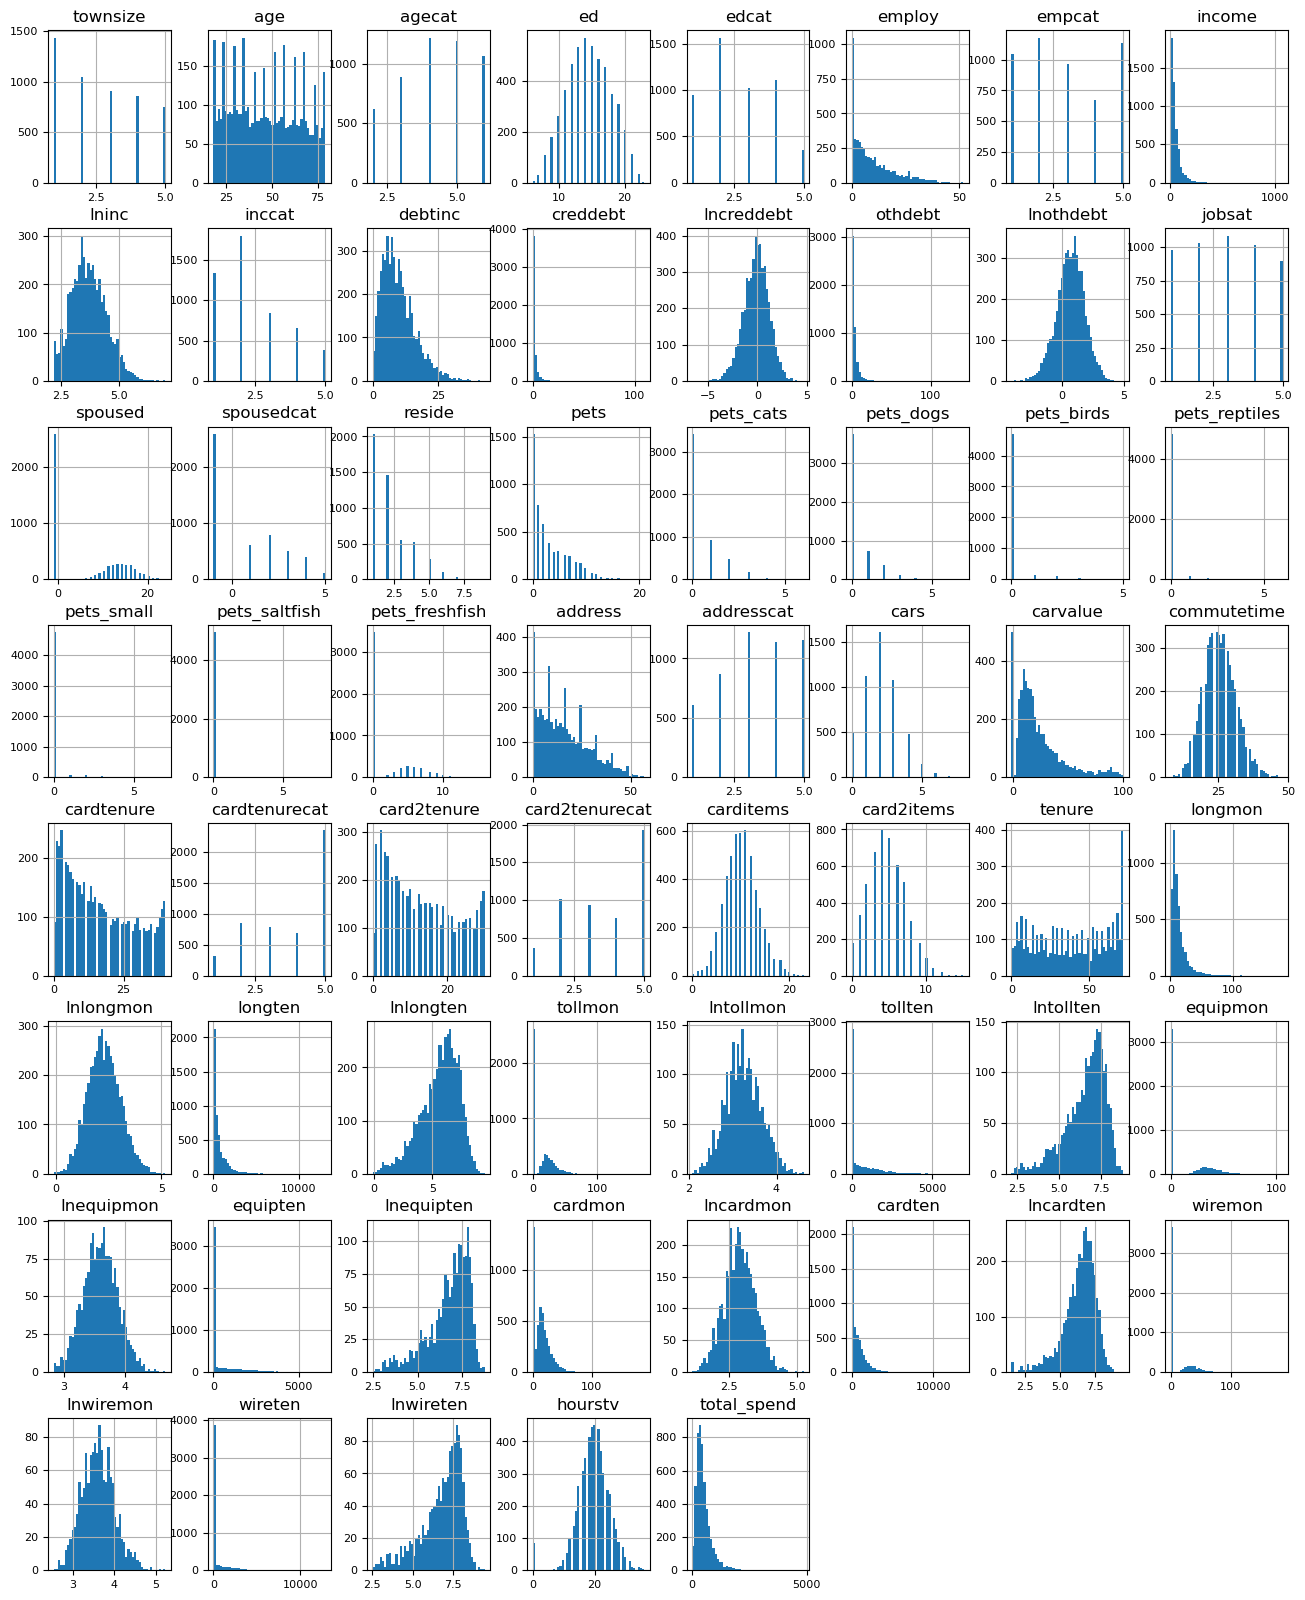

In [103]:
# Histogram for each variable
credit_card.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Insight
* There are no duplicates and each row corresponds to a single customer
* We have 4886 unique values for total credit spend
* Data is equally distributed over 5 regions with nearly 20% population in each
* The distribution of gender is almost 50% each which is in line with the global trend
* Age ranges from 18 to 79
* Years of education ranges from 6 to 23
* Only 4262 people are currently working in the dataset and not retired
* Income ranges from 9 to 1073

# Bivariate Analysis

In [107]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select the variables to test
variables = cat_var_names
#variables.remove('total_spend')

# Perform chi-square test for each variable
results = []
for variable in variables:
    contingency_table = pd.crosstab(credit_card[variable], credit_card['total_spend'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results.append({'Variable': variable, 'Chi-square': chi2, 'p-value': p_value})

# Create a DataFrame with the test results
results_df = pd.DataFrame(results)

# Display the results
results_df

,Variable,Chi-square,p-value
0,region,19544.167287,0.490246
1,gender,4894.661206,0.458417
2,jobcat,24375.732776,0.587081
3,union,4858.447323,0.603484
4,retire,4875.477794,0.535719
...,...,...,...
63,ownfax,4891.030859,0.472999
64,news,4890.337345,0.475790
65,response_01,4889.049933,0.480975
66,response_02,4892.284590,0.467957


In [33]:
#user defined function in python
def test_summary(x):
    mean = x.mean()
    sum = x.sum()
    std = x.std()
    return pd.Series([mean, sum, std], index=['avg', 'total', 'std'])

In [34]:
#Summary of functions applied on total spend.
pd.set_option('display.float_format', lambda x: '%.6f' % x)
test_summary(credit_card_num.total_spend)


avg         498.078630
total   2490393.150000
std         351.529270
dtype: float64

In [35]:
#Summary of functions applied on numerical type variables of given dataset.
pd.set_option('display.float_format', lambda x: '%.6f' % x)
credit_card_num.apply(test_summary).T

,avg,total,std
townsize,2.687275,13431.000000,1.425925
age,47.025600,235128.000000,17.770338
agecat,4.238800,21194.000000,1.308785
ed,14.543000,72715.000000,3.281083
edcat,2.672000,13360.000000,1.211738
...,...,...,...
lnwiremon,3.605001,4845.120915,0.390102
wireten,421.984610,2109923.050000,1001.003287
lnwireten,6.808132,9150.129457,1.283967
hourstv,19.645000,98225.000000,5.165609


In [36]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [37]:
#Applying general function on the numerical variables dataset.
credit_card_num.apply(var_summary)

,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
N,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,3581.000000,4998.000000,3578.000000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000,5000.000000
NMISS,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1419.000000,2.000000,1422.000000,0.000000,3656.000000,0.000000,3656.000000,0.000000,0.000000
SUM,13431.000000,235128.000000,21194.000000,72715.000000,13360.000000,48652.000000,14663.000000,273798.000000,18499.546992,11961.000000,...,77219.250000,10419.752778,3600951.000000,22993.332638,53505.950000,4845.120915,2109923.050000,9150.129457,98225.000000,2490393.150000
MEAN,2.687275,47.025600,4.238800,14.543000,2.672000,9.730400,2.932600,54.759600,3.699909,2.392200,...,15.443850,2.909733,720.478391,6.426309,10.701190,3.605001,421.984610,6.808132,19.645000,498.078630
MEDIAN,3.000000,47.000000,4.000000,14.000000,2.000000,7.000000,3.000000,38.000000,3.637586,2.000000,...,13.750000,2.904165,425.000000,6.639876,0.000000,3.597997,0.000000,7.147185,20.000000,414.250000
STD,1.425925,17.770338,1.308785,3.281083,1.211738,9.690929,1.453300,55.377511,0.747072,1.221261,...,15.007569,0.564859,922.225527,1.172050,19.799837,0.390102,1001.003287,1.283967,5.165609,351.529270
VAR,2.033262,315.784902,1.712917,10.765504,1.468310,93.914099,2.112080,3066.668742,0.558116,1.491477,...,225.227130,0.319066,850499.921936,1.373700,392.033527,0.152179,1002007.580073,1.648571,26.683512,123572.827720
CV,0.530621,0.377886,0.308763,0.225613,0.453495,0.995944,0.495567,1.011284,0.201916,0.510518,...,0.971751,0.194127,1.280018,0.182383,1.850246,0.108211,2.372132,0.188593,0.262948,0.705771
MIN,1.000000,18.000000,2.000000,6.000000,1.000000,0.000000,1.000000,9.000000,2.197225,1.000000,...,0.000000,1.178655,0.000000,1.558145,0.000000,2.541602,0.000000,2.541602,0.000000,8.110000
P1,1.000000,18.000000,2.000000,8.000000,1.000000,0.000000,1.000000,9.000000,2.197225,1.000000,...,0.000000,1.658228,0.000000,2.484907,0.000000,2.806811,0.000000,3.039749,0.000000,58.197600


In [38]:
#Taking transpose of the above dataframe and saving it to another variable.
num_summary=credit_card_num.apply(var_summary).T.round(1).sort_values('NMISS',ascending=False)

In [39]:
#Summary of numerical dataframe.
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
lnwireten,1344.000000,3656.000000,9150.100000,6.800000,7.100000,1.300000,1.600000,0.200000,2.500000,3.000000,4.100000,4.900000,6.200000,7.100000,7.800000,8.100000,8.300000,8.700000,9.500000
lnwiremon,1344.000000,3656.000000,4845.100000,3.600000,3.600000,0.400000,0.200000,0.100000,2.500000,2.800000,3.000000,3.100000,3.300000,3.600000,3.900000,4.100000,4.300000,4.600000,5.200000
lnequipten,1704.000000,3296.000000,11497.400000,6.700000,7.100000,1.200000,1.400000,0.200000,2.500000,3.200000,4.300000,5.000000,6.200000,7.100000,7.600000,8.000000,8.100000,8.400000,8.800000
lnequipmon,1704.000000,3296.000000,6134.800000,3.600000,3.600000,0.300000,0.100000,0.100000,2.800000,3.000000,3.100000,3.200000,3.400000,3.600000,3.800000,4.000000,4.100000,4.300000,4.700000
lntollmon,2378.000000,2622.000000,7712.400000,3.200000,3.200000,0.400000,0.200000,0.100000,2.100000,2.300000,2.600000,2.700000,3.000000,3.200000,3.500000,3.800000,3.900000,4.200000,4.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pets_saltfish,5000.000000,0.000000,233.000000,0.000000,0.000000,0.500000,0.200000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000
pets_freshfish,5000.000000,0.000000,9237.000000,1.800000,0.000000,3.100000,9.500000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,8.000000,11.000000,16.000000
address,5000.000000,0.000000,82012.000000,16.400000,14.000000,12.400000,153.700000,0.800000,0.000000,0.000000,1.000000,2.000000,6.000000,14.000000,25.000000,34.000000,40.000000,48.000000,57.000000
addresscat,5000.000000,0.000000,16360.000000,3.300000,3.000000,1.300000,1.700000,0.400000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000


# Data Analysis of categorical datatypes in given dataset

In [40]:
#Selecting the categorical variables from the dataset.
credit_card_cat=credit_card.select_dtypes(include=['object'])

In [41]:
#Categorical Features
credit_card_cat.head(5)

,region,gender,jobcat,union,retire,default,marital,homeown,hometype,carown,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,1,1,1,0,1,0,0,2,1,...,0,0,0,1,1,0,0,0,1,0
1,5,0,2,0,0,1,0,1,3,1,...,1,1,1,1,1,1,1,0,0,0
2,3,1,2,0,0,0,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
3,4,0,2,0,0,1,1,1,3,1,...,1,0,1,1,1,0,1,1,0,0
4,2,0,2,0,0,0,1,0,2,0,...,1,0,1,0,1,0,0,0,1,0


In [42]:
#Create Data audit Report for categorical variables
def cat_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

cat_summary=credit_card_cat.apply(cat_summary).T

In [43]:
#Summary after applying user-defined function on categorical variables.
cat_summary

,N,NMISS,MODE,FREQ,PERCENT
region,5000.000000,0.000000,5.000000,1027.000000,20.540000
gender,5000.000000,0.000000,1.000000,2518.000000,50.360000
jobcat,5000.000000,0.000000,2.000000,1640.000000,32.800000
union,5000.000000,0.000000,0.000000,4244.000000,84.880000
retire,5000.000000,0.000000,0.000000,4262.000000,85.240000
...,...,...,...,...,...
ownfax,5000.000000,0.000000,0.000000,4106.000000,82.120000
news,5000.000000,0.000000,0.000000,2637.000000,52.740000
response_01,5000.000000,0.000000,0.000000,4582.000000,91.640000
response_02,5000.000000,0.000000,0.000000,4351.000000,87.020000


# Outlier Treatment

In [44]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

credit_card_num=credit_card_num.apply(outlier_capping)

In [45]:
#Summary after applying outlier capping at 99%(upper) and 1%(lower)
outlier_treatment = credit_card_num.apply(var_summary).T.round(2)

In [46]:
outlier_treatment

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
townsize,4998.000000,2.000000,13431.000000,2.690000,3.000000,1.430000,2.030000,0.530000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000
age,5000.000000,0.000000,235128.000000,47.030000,47.000000,17.770000,315.780000,0.380000,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
agecat,5000.000000,0.000000,21194.000000,4.240000,4.000000,1.310000,1.710000,0.310000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000
ed,5000.000000,0.000000,72721.000000,14.540000,14.000000,3.240000,10.510000,0.220000,8.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,21.000000
edcat,5000.000000,0.000000,13360.000000,2.670000,2.000000,1.210000,1.470000,0.450000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lnwiremon,1344.000000,3656.000000,4844.080000,3.600000,3.600000,0.380000,0.150000,0.110000,2.810000,2.810000,2.990000,3.120000,3.330000,3.600000,3.870000,4.100000,4.270000,4.570000,4.580000
wireten,5000.000000,0.000000,2049800.100000,409.960000,0.000000,930.010000,864913.760000,2.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.960000,1778.540000,2687.920000,4530.100000,4530.190000
lnwireten,1344.000000,3656.000000,9150.150000,6.810000,7.150000,1.270000,1.620000,0.190000,3.040000,3.040000,4.110000,4.880000,6.160000,7.150000,7.760000,8.110000,8.310000,8.680000,8.690000
hourstv,5000.000000,0.000000,98133.000000,19.630000,20.000000,5.120000,26.210000,0.260000,0.000000,0.000000,12.000000,14.000000,17.000000,20.000000,23.000000,26.000000,28.000000,31.000000,31.000000


# Handling Missing Values

In [47]:
#Handling missings - User Defined Function
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

credit_card_num=credit_card_num.apply(Missing_imputation)

In [48]:
#Summary after applying imputation function for handling missing values.
num_summary=credit_card_num.apply(var_summary).T.round(2)
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
townsize,5000.000000,0.000000,13436.370000,2.690000,3.000000,1.430000,2.030000,0.530000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000
age,5000.000000,0.000000,235128.000000,47.030000,47.000000,17.770000,315.780000,0.380000,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
agecat,5000.000000,0.000000,21194.000000,4.240000,4.000000,1.310000,1.710000,0.310000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000
ed,5000.000000,0.000000,72721.000000,14.540000,14.000000,3.240000,10.510000,0.220000,8.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,21.000000
edcat,5000.000000,0.000000,13360.000000,2.670000,2.000000,1.210000,1.470000,0.450000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lnwiremon,5000.000000,0.000000,18021.130000,3.600000,3.600000,0.200000,0.040000,0.050000,2.810000,2.940000,3.250000,3.470000,3.600000,3.600000,3.600000,3.710000,3.940000,4.360000,4.580000
wireten,5000.000000,0.000000,2049800.100000,409.960000,0.000000,930.010000,864913.760000,2.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.960000,1778.540000,2687.920000,4530.100000,4530.190000
lnwireten,5000.000000,0.000000,34040.750000,6.810000,6.810000,0.660000,0.440000,0.100000,3.040000,3.760000,5.740000,6.680000,6.810000,6.810000,6.810000,7.480000,7.900000,8.420000,8.690000
hourstv,5000.000000,0.000000,98133.000000,19.630000,20.000000,5.120000,26.210000,0.260000,0.000000,0.000000,12.000000,14.000000,17.000000,20.000000,23.000000,26.000000,28.000000,31.000000,31.000000


In [49]:
# Dropping few duplicate variables like log variables with lots of missing values.
credit_card_num.drop(columns=['lnwiremon','lnwireten','lnequipten','lnequipmon','lntollten','lntollmon','lncardten','lncardmon'],inplace=True)

# Handling Categorical Variables

In [50]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [51]:
#for c_feature in categorical_features
#Applying utility function to create dummy variables for further analysis of categorical variables.

for c_feature in [credit_card_cat.columns]:
    credit_card_cat[c_feature] = credit_card_cat[c_feature].astype('category')
    credit_card_cat = create_dummies(credit_card_cat , c_feature )
credit_card_cat

,region_2,region_3,region_4,region_5,gender_1,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4996,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4997,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4998,0,0,0,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,0,0,0


In [108]:
# Chi Square test on selected categorical
import pandas as pd
from scipy.stats import chi2_contingency

# Select the variables to test
variables = credit_card_cat.columns
#variables.remove('total_spend')

# Perform chi-square test for each variable
results = []
for variable in variables:
    contingency_table = pd.crosstab(credit_card_cat[variable], credit_card['total_spend'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results.append({'Variable': variable, 'Chi-square': chi2, 'p-value': p_value})

# Create a DataFrame with the test results
results_df = pd.DataFrame(results)

# Display the results
results_df


KeyboardInterrupt: 

In [52]:
credit_card_new = pd.concat([credit_card_num, credit_card_cat], axis=1)
credit_card_new

,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,2.000000,20,2,15.000000,3,0.000000,1,31.000000,3.433987,2,...,0,0,0,1,1,0,0,0,1,0
1,5.000000,22,2,17.000000,4,0.000000,1,15.000000,2.708050,1,...,1,1,1,1,1,1,1,0,0,0
2,4.000000,67,6,14.000000,2,16.000000,5,35.000000,3.555348,2,...,1,0,0,0,0,0,1,0,0,0
3,3.000000,23,2,16.000000,3,0.000000,1,20.000000,2.995732,1,...,1,0,1,1,1,0,1,1,0,0
4,2.000000,26,3,16.000000,3,1.000000,1,23.000000,3.135494,1,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.000000,68,6,10.000000,1,24.000000,5,196.000000,5.278115,5,...,1,0,0,0,0,0,1,0,0,0
4996,3.000000,51,5,14.000000,2,6.000000,3,83.000000,4.418841,4,...,1,0,0,0,0,0,0,0,0,0
4997,5.000000,75,6,17.000000,4,24.000000,5,108.000000,4.682131,4,...,1,1,0,0,0,0,1,0,0,0
4998,1.000000,47,4,19.000000,4,3.000000,2,189.000000,5.241747,5,...,1,0,1,1,1,0,1,0,0,0


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


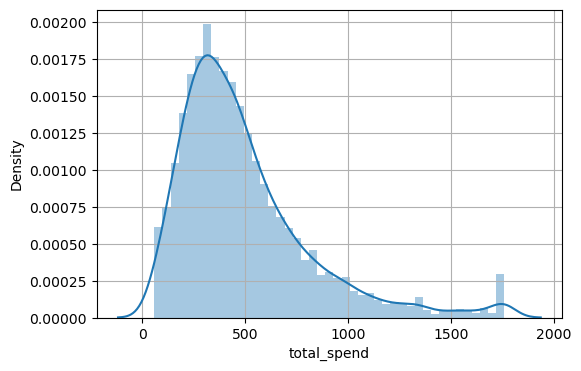

In [53]:
#Plot to check the distribution of dependent variable.
sns.distplot(credit_card_new.total_spend)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


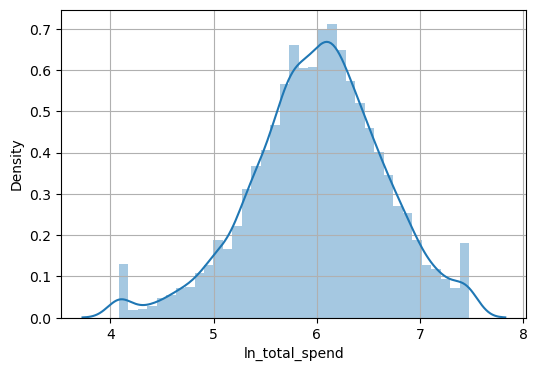

In [54]:
#Plot after taking logarithmic conversion of dependent variables for validating assumption of Linear Regression.
credit_card_new['ln_total_spend']=np.log(credit_card_new['total_spend']+1)
sns.distplot(credit_card_new.ln_total_spend)
plt.show()

# Correlation matrix to check the univariate and bi-variate analysis of variables

In [55]:
# correlation matrix
corrm = credit_card_new.corr()
#corrm.to_csv('corrm.csv')
corrm

,townsize,age,agecat,ed,edcat,employ,empcat,income,lninc,inccat,...,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,ln_total_spend
townsize,1.000000,-0.075454,-0.069069,0.002901,0.003684,-0.059279,-0.058155,-0.009513,0.000895,-0.007590,...,0.022748,0.002663,0.005330,0.007894,-0.000636,-0.028673,-0.006225,-0.010036,-0.007200,0.006104
age,-0.075454,1.000000,0.969879,-0.093966,-0.081129,0.705515,0.739573,0.208286,0.142984,0.209659,...,-0.074423,-0.133284,-0.217524,-0.235226,-0.042090,0.365204,0.015140,0.013175,-0.026231,0.007393
agecat,-0.069069,0.969879,1.000000,-0.078331,-0.064124,0.679902,0.732246,0.234081,0.190188,0.249394,...,-0.059490,-0.123192,-0.208690,-0.223387,-0.029310,0.348275,0.010039,0.010467,-0.014860,0.030306
ed,0.002901,-0.093966,-0.078331,1.000000,0.966489,-0.214669,-0.197841,0.186802,0.206332,0.196343,...,0.300016,0.435623,0.369831,0.377019,0.276163,-0.073510,-0.117333,0.073750,0.107912,0.098110
edcat,0.003684,-0.081129,-0.064124,0.966489,1.000000,-0.199709,-0.185672,0.187173,0.207209,0.197250,...,0.293125,0.414619,0.357481,0.361191,0.273646,-0.068420,-0.112653,0.070172,0.106223,0.094751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
news_1,-0.028673,0.365204,0.348275,-0.073510,-0.068420,0.368778,0.369206,0.138730,0.108047,0.134251,...,-0.037949,-0.061753,-0.099716,-0.089811,-0.024573,1.000000,0.020919,0.030136,-0.011148,0.029929
response_01_1,-0.006225,0.015140,0.010039,-0.117333,-0.112653,0.039085,0.030418,-0.002440,-0.001206,-0.001148,...,-0.023472,-0.107194,-0.069870,-0.096176,-0.014592,0.020919,1.000000,-0.015601,-0.018781,-0.009181
response_02_1,-0.010036,0.013175,0.010467,0.073750,0.070172,0.014410,0.017504,0.062895,0.061287,0.062603,...,0.021608,0.039891,0.015485,0.011744,0.032549,0.030136,-0.015601,1.000000,0.028266,0.026863
response_03_1,-0.007200,-0.026231,-0.014860,0.107912,0.106223,-0.029312,-0.032850,0.053011,0.060666,0.055488,...,0.077116,0.089388,0.072791,0.094278,0.093360,-0.011148,-0.018781,0.028266,1.000000,0.061558


<AxesSubplot:>

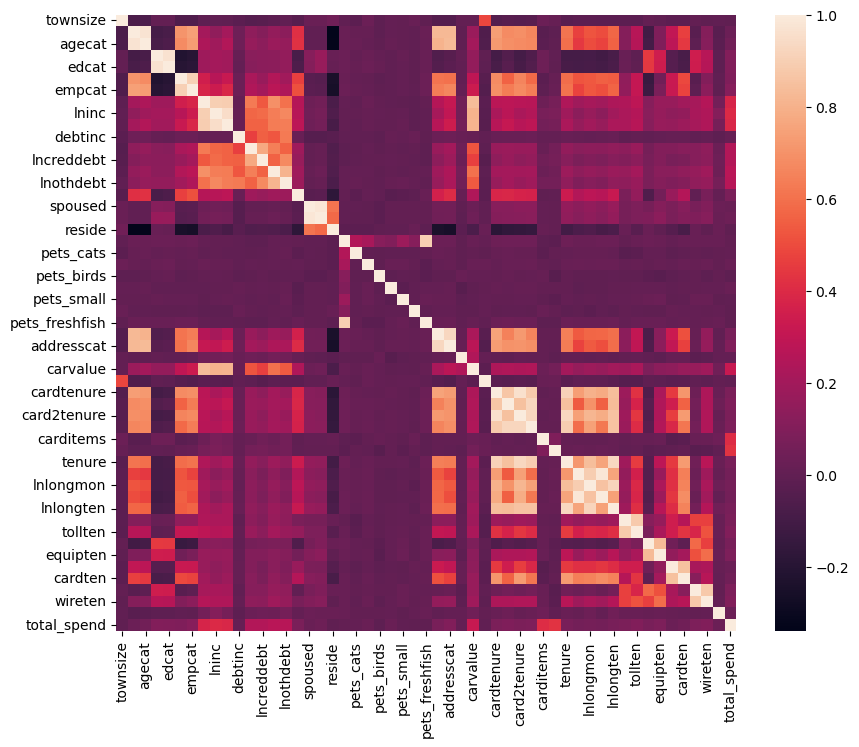

In [56]:
# heatmap showing correlation
plt.figure(figsize = (10, 8))
sns.heatmap(credit_card_num.corr())

<AxesSubplot:>

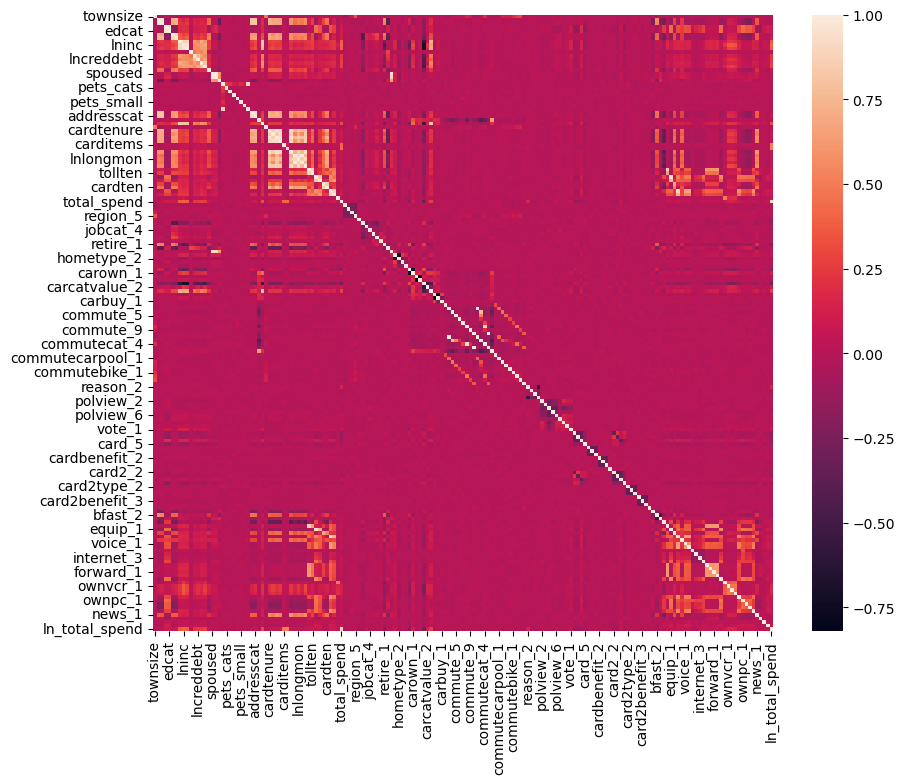

In [57]:
# heatmap showing correlation
plt.figure(figsize = (10, 8))
sns.heatmap(credit_card_new.corr())

# Model Building

In [58]:
#Splitting the data
feature_columns = credit_card_new.columns.difference( ['ln_total_spend', 'total_spend'] )
feature_columns

Index(['active_1', 'address', 'addresscat', 'age', 'agecat', 'bfast_2',
       'bfast_3', 'callcard_1', 'callid_1', 'callwait_1',
       ...
       'tollfree_1', 'tollmon', 'tollten', 'townsize', 'union_1', 'voice_1',
       'vote_1', 'wireless_1', 'wiremon', 'wireten'],
      dtype='object', length=171)

In [110]:
#This will be used in sklearn related functions
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_card_new[feature_columns],
                                                  credit_card_new['ln_total_spend'],
                                                  test_size = 0.3,
                                                   random_state=567890)

In [111]:
print(len( train_X ))
print(len( test_X))

3500
1500


In [112]:
#from sklearn.cross_validation import train_test_split

train, test = train_test_split( credit_card_new,test_size = 0.3,random_state = 1234 )

In [113]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['townsize', 'age', 'agecat', 'ed', 'edcat', 'employ', 'empcat',
       'income', 'lninc', 'inccat',
       ...
       'ownpda_1', 'ownpc_1', 'ownipod_1', 'owngame_1', 'ownfax_1', 'news_1',
       'response_01_1', 'response_02_1', 'response_03_1', 'ln_total_spend'],
      dtype='object', length=173)

In [114]:
#Getting all columns in form of a formula to be used in statistical model building.
all_columns = "+".join(train.columns.difference( ['ln_total_spend'] ))

print(all_columns)

active_1+address+addresscat+age+agecat+bfast_2+bfast_3+callcard_1+callid_1+callwait_1+carbought_0+carbought_1+carbuy_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card2benefit_2+card2benefit_3+card2benefit_4+card2fee_1+card2items+card2tenure+card2tenurecat+card2type_2+card2type_3+card2type_4+card_2+card_3+card_4+card_5+cardbenefit_2+cardbenefit_3+cardbenefit_4+cardfee_1+carditems+cardmon+cardten+cardtenure+cardtenurecat+cardtype_2+cardtype_3+cardtype_4+carown_0+carown_1+cars+cartype_0+cartype_1+carvalue+churn_1+commute_10+commute_2+commute_3+commute_4+commute_5+commute_6+commute_7+commute_8+commute_9+commutebike_1+commutebus_1+commutecar_1+commutecarpool_1+commutecat_2+commutecat_3+commutecat_4+commutecat_5+commutemotorcycle_1+commutenonmotor_1+commutepublic_1+commuterail_1+commutetime+commutewalk_1+confer_1+creddebt+debtinc+default_1+ebill_1+ed+edcat+empcat+employ+equip_1+equipmon+equipten+forward_1+gender_1+homeown_1+hometype_2+hometype_3+hometype_4+hour

In [115]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression()

In [116]:
linreg.score(train_X, train_y)

0.7108706966831837

In [117]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([5.30655925, 5.15642353, 6.07572075, ..., 6.51816372, 4.31668138,
       5.20157233])

In [118]:
# Calculation of r2 value for training dataset.
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print(rmse_t)
print(metrics.r2_score( train_y, y_pred_t ))

0.3430956882857008
0.7108706966831837


In [119]:
# Calculation of r2 value for testing dataset.
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print(rmse)
print(metrics.r2_score( test_y, y_pred ))

0.37083102754859565
0.6778689622421374


In [120]:
results = pd.DataFrame({'Actual': test_y,'Predicted':y_pred})
results.head()

,Actual,Predicted
4742,6.580459,6.672799
1518,5.817081,5.751750
2227,6.830280,6.337926
3646,5.755426,5.783589
3719,5.774458,5.341275


In [70]:
residuals = train_y - y_pred_t

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


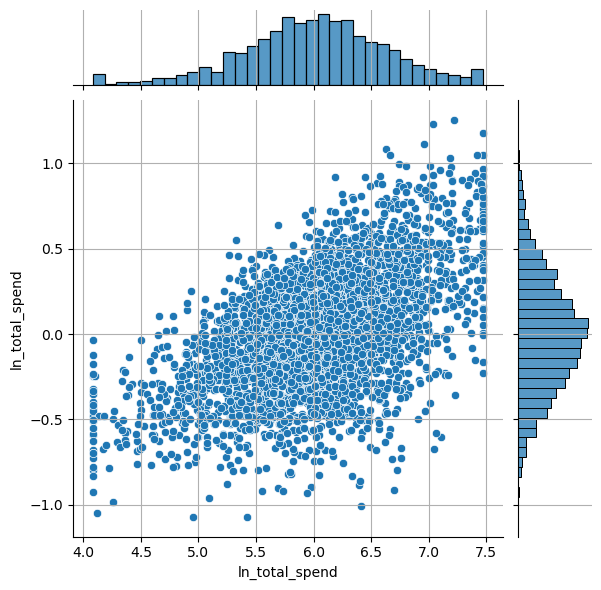

In [71]:
# Plot to visualize the distribution of residuals.
sns.jointplot(  train_y, residuals )

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_total_spend', ylabel='Density'>

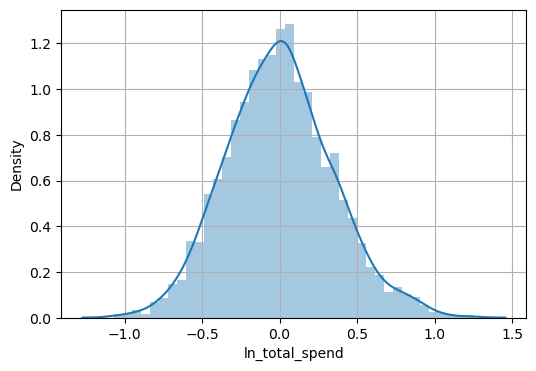

In [72]:
sns.distplot( residuals )

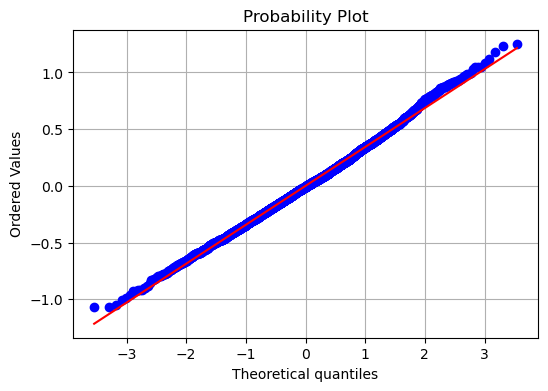

In [73]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [74]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [75]:
linreg = LinearRegression()

In [76]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

array([0.68911076, 0.6941954 , 0.68222277, 0.63981207, 0.69181081,
       0.67537424, 0.65557297, 0.68639644, 0.68167645, 0.69785661])

In [77]:
# Mean r2 value after applying K-Fold cross validation.
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.68

In [122]:
import numpy as np

# Assuming you have the predicted values in logarithmic form

# Convert the predicted values from log scale back to the original scale
y_pred_original_scale = np.exp(y_pred_first_10)
actual_values_original_scale = np.exp(test_y[:10])

# Create a DataFrame to display the actual and predicted values in the original scale
predictions_original_scale_df = pd.DataFrame({'Actual Values (Original Scale)': actual_values_original_scale, 'Predicted Values (Original Scale)': y_pred_original_scale})

# Print the DataFrame
print(predictions_original_scale_df)

NameError: name 'y_pred_first_10' is not defined